In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras import backend as K
import sklearn
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve

## Import Data

In [3]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Check the balance of Data

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Split Data to Train and Test

In [6]:
features=df.iloc[:,:-1]
labels=df.iloc[:,-1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.2,random_state=100, stratify=labels)

In [8]:
for dataset in [y_train, y_test]:
    print(round(len(dataset)/len(labels),2))
    print(dataset.value_counts())

0.8
0    227451
1       394
Name: Class, dtype: int64
0.2
0    56864
1       98
Name: Class, dtype: int64


## Normalized Data

In [9]:
Scaled=MinMaxScaler(feature_range = (0, 1))
#it makes more scence to fit on train data and then transform for all train, test, validation data.

In [10]:
X_train=Scaled.fit(X_train).transform(X_train)

In [11]:
X_test=Scaled.transform(X_test)

# Create ANN Model

In [42]:
def define_model():
    model = Sequential()
    model.add(Dense(32,input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    print(model.summary())
    return model

In [43]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# get the model
model = define_model()

# compile the model
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________
None


# Train Model

In [44]:
# fit the model
history=model.fit(x=X_train, y=y_train,
          validation_split=0.1,
          batch_size=512,  #power 2
          shuffle = True,
          epochs=50,
          verbose = 1,
          )

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

Train on 205060 samples, validate on 22785 samples
Epoch 1/50
205060/205060 [==============================] - 1s 6us/sample - loss: 0.0354 - acc: 0.9982 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.0095 - val_acc: 0.9983 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/50
205060/205060 [==============================] - 1s 4us/sample - loss: 0.0077 - acc: 0.9984 - f1_m: 0.0721 - precision_m: 0.0885 - recall_m: 0.0655 - val_loss: 0.0052 - val_acc: 0.9989 - val_f1_m: 0.2111 - val_precision_m: 0.2444 - val_recall_m: 0.1963
Epoch 3/50
205060/205060 [==============================] - 1s 4us/sample - loss: 0.0043 - acc: 0.9990 - f1_m: 0.3228 - precision_m: 0.3537 - recall_m: 0.3144 - val_loss: 0.0035 - val_acc: 0.9993 - val_f1_m: 0.4104 - val_precision_m: 0.4333 - val_recall_m: 0.4111
Epoch 4/50
205060/205060 [==============================] - 1s 4us/sample - loss: 0.0035 - acc: 0.9993 - f1_m: 0.4155 - precision_m: 

Epoch 32/50
205060/205060 [==============================] - 1s 4us/sample - loss: 0.0031 - acc: 0.9994 - f1_m: 0.4764 - precision_m: 0.4971 - recall_m: 0.4750 - val_loss: 0.0031 - val_acc: 0.9995 - val_f1_m: 0.4630 - val_precision_m: 0.4778 - val_recall_m: 0.4667
Epoch 33/50
205060/205060 [==============================] - 1s 4us/sample - loss: 0.0031 - acc: 0.9994 - f1_m: 0.4706 - precision_m: 0.4859 - recall_m: 0.4732 - val_loss: 0.0033 - val_acc: 0.9996 - val_f1_m: 0.4948 - val_precision_m: 0.5111 - val_recall_m: 0.4963
Epoch 34/50
205060/205060 [==============================] - 1s 4us/sample - loss: 0.0030 - acc: 0.9994 - f1_m: 0.4652 - precision_m: 0.4833 - recall_m: 0.4633 - val_loss: 0.0034 - val_acc: 0.9996 - val_f1_m: 0.4630 - val_precision_m: 0.4667 - val_recall_m: 0.4667
Epoch 35/50
205060/205060 [==============================] - 1s 4us/sample - loss: 0.0030 - acc: 0.9994 - f1_m: 0.4691 - precision_m: 0.4820 - recall_m: 0.4678 - val_loss: 0.0031 - val_acc: 0.9995 - val_f1

In [45]:
# evaluate the model
print('evaluate test', model.evaluate(X_test, y_test, verbose=2)) #verbose

56962/56962 - 1s - loss: 0.0038 - acc: 0.9993 - f1_m: 0.0411 - precision_m: 0.0408 - recall_m: 0.0415
evaluate test [0.0037894020865539223, 0.9993153, 0.04106307, 0.04080105, 0.041549686]


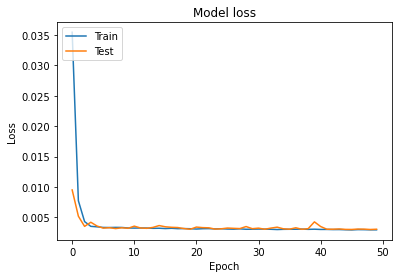

In [46]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


In [48]:
train_predictions_baseline = model.predict(X_train, batch_size=1000)
test_predictions_baseline = model.predict(X_test, batch_size=1000)

In [49]:
def plot_confusion(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True)
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Legitimate Transactions Detected (True Negatives):  56847
Legitimate Transactions Incorrectly Detected (False Positives):  17
Fraudulent Transactions Missed (False Negatives):  22
Fraudulent Transactions Detected (True Positives):  76
Total Fraudulent Transactions:  98


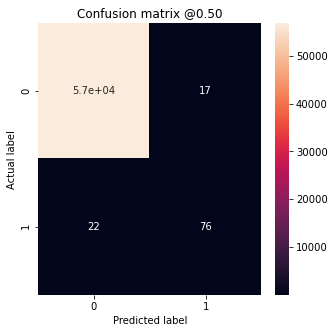

In [50]:
 plot_confusion(y_test, test_predictions_baseline)

It is okay to have some False positive which are detected as Fraud, because we can undo them. But we would like to minimize false negative! so we have to improve recall!


In [51]:
print(classification_report(y_test,test_predictions_baseline>0.5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.78      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [52]:
print(roc_auc_score(y_test,test_predictions_baseline>0.5))

0.8876056225810527


# Handling Imbalance Data by Increasing class weight of Class=1

### Increase class weight of positive instances

In [53]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.

neg, pos = np.bincount(df['Class'])
total = neg + pos

weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


In [54]:
weighted_model = define_model()

# compile the model
weighted_model.compile(optimizer='RMSProp', 
                       loss='binary_crossentropy', 
                       metrics=['acc',f1_m,precision_m, recall_m]
                      )

# fit the model
history = weighted_model.fit(X_train, y_train, 
                             validation_split=0.1, 
                             epochs=50, 
                             verbose=1,
                             batch_size=1000, 
                             class_weight=class_weight
                            )

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________
None
Train on 205060 samples, validate on 22785 samples
Epoch 1/50
205060/205060 [==============================] - 1s 5us/sample - loss: 0.6123 - acc: 0.9987 - f1_m: 0.3494 - precision_m: 0.4092 - recall_m: 0.3313 - val_loss: 0.5321 - val_acc: 0.998

# Evaluate the Final Model

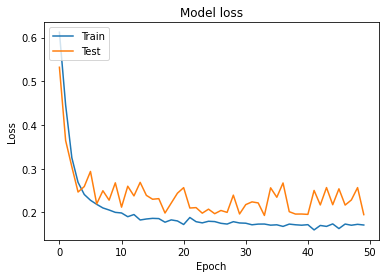

In [55]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [56]:
train_predictions_baseline = weighted_model.predict(X_train, batch_size=1000)
test_predictions_baseline = weighted_model.predict(X_test, batch_size=1000)

In [57]:
print(classification_report(y_test,test_predictions_baseline>0.5))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.85      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.56     56962
weighted avg       1.00      0.98      0.99     56962



Legitimate Transactions Detected (True Negatives):  55747
Legitimate Transactions Incorrectly Detected (False Positives):  1117
Fraudulent Transactions Missed (False Negatives):  15
Fraudulent Transactions Detected (True Positives):  83
Total Fraudulent Transactions:  98


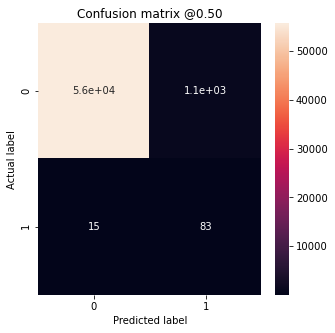

In [58]:
 plot_confusion(y_test, test_predictions_baseline)

# Find Optimal Cutoff

In [59]:
def find_optimal_cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    #false positive rate, True positive rate
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    
    # Plot tpr vs 1-fpr
    fig, ax = plt.subplots()
    plt.plot(tpr)
    plt.plot(1-fpr, color = 'red')
    plt.xlabel('1-False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    ax.set_xticklabels([])
    return list(roc_t['threshold']) 

In [60]:
test_predictions_weighted = weighted_model.predict(X_test, batch_size=1000)

[0.19890174269676208]

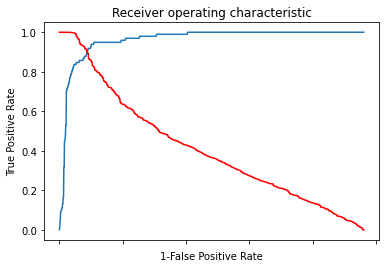

In [61]:
find_optimal_cutoff(y_test, test_predictions_weighted)

Legitimate Transactions Detected (True Negatives):  51005
Legitimate Transactions Incorrectly Detected (False Positives):  5859
Fraudulent Transactions Missed (False Negatives):  10
Fraudulent Transactions Detected (True Positives):  88
Total Fraudulent Transactions:  98


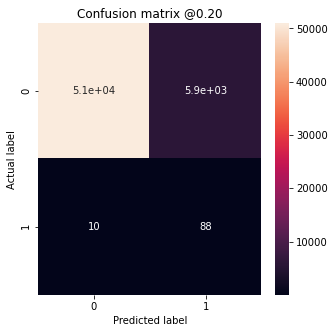

In [67]:
plot_confusion(y_test, test_predictions_weighted, p=0.20)

In [68]:
print(classification_report(y_test, test_predictions_weighted>0.20))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.01      0.90      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.90      0.49     56962
weighted avg       1.00      0.90      0.94     56962



In [69]:
roc_auc_score(y_test, test_predictions_weighted>0.20)

0.8974619356746637